# MODELO DE XGBOOST

librerías necesarias para la implementación del modelo de XGBoost y la visualización de los resultados obtenidos.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import optuna
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report, roc_curve, auc

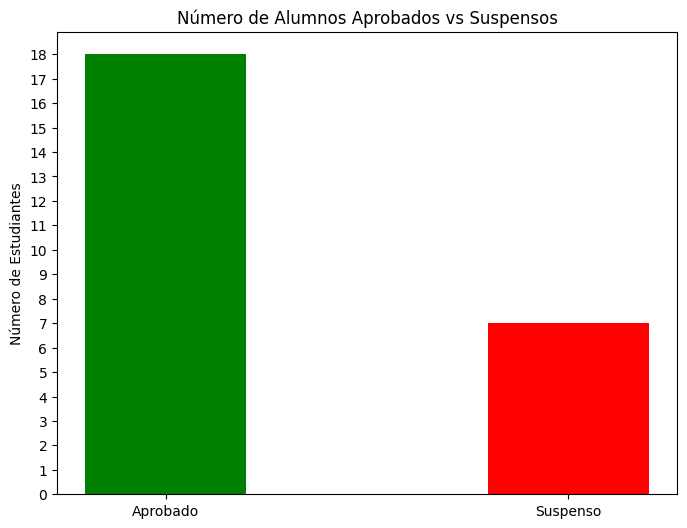

In [84]:
#Carga de los archivos para train y test. Utilizaré los datos de las clases 96, 89 y 81 para entrenar el modelo y para probar el modelo utilizaré los datos de la clase 84
train_data = pd.read_excel('train.xlsx')
test_data = pd.read_excel('test.xlsx')

#Visualización de los datos del dataset "test"
#Primero contamos los alumnos aprobados y los alumnos suspensos
aprobados = test_data[test_data['nota_final_aprobado'] == 'SI'].shape[0]
suspensos = test_data[test_data['nota_final_aprobado'] == 'NO'].shape[0]

#Creación del gráfico de barras para la visualización de los datos
plt.figure(figsize=(8, 6))
max_value = max(aprobados, suspensos)
plt.yticks(range(0, max_value + 1))
plt.bar('Aprobado', aprobados, width=0.4, color='green')
plt.bar('Suspenso', suspensos, width=0.4, color='red')
plt.title('Número de Alumnos Aprobados vs Suspensos')
plt.ylabel('Número de Estudiantes')
plt.show()

In [85]:
#Visualización de los datos
train_data.head()

,login_est,created,submitted,uploaded,viewed,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,diferencia_dias_week1,accesos_week1,wooclap_average,nota_final_aprobado
0,1,0,0,0,9,1,0,1,5,2,0,0,-1,4,-1,NO
1,2,0,0,0,5,0,0,0,2,3,0,0,-1,3,-1,SI
2,3,1,1,1,27,2,0,0,18,10,0,0,2,3,-1,SI
3,4,1,1,1,25,0,0,0,21,0,5,2,-1,-1,-1,SI
4,5,1,1,1,77,1,0,0,73,6,0,0,-1,3,-1,SI


In [86]:
# Asumiendo que ya has definido los dataframes train_data y test_data
encoder = LabelEncoder()
train_data['nota_final_aprobado'] = encoder.fit_transform(train_data['nota_final_aprobado'])
test_data['nota_final_aprobado'] = encoder.transform(test_data['nota_final_aprobado'])

X_train = train_data.drop('nota_final_aprobado', axis=1)
y_train = train_data['nota_final_aprobado']
X_test = test_data.drop('nota_final_aprobado', axis=1)
y_test = test_data['nota_final_aprobado']

# Normalización de los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Función objetivo para Optuna
def objective(trial):
    #Parámetros que se desean optimizar
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    #Se define el modelo con los hiperparámetros
    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=5,
        eval_metric='logloss'
    )
    # Entrenamiento del modelo
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

#Se realiza la optimización con 50 intentos
optimizacion = optuna.create_study(direction='maximize')
optimizacion.optimize(objective, n_trials=50)

#Mejores hiperparámetros encontrados
print("Parámetros del mejor intento:", optimizacion.best_trial.params)
print("Mejor Accuracy del mejor intento:", optimizacion.best_trial.value)

[I 2024-08-28 12:26:29,900] A new study created in memory with name: no-name-dc27b6f8-9606-4ab8-b594-acb3477ee284
C:\Users\david\AppData\Local\Temp\ipykernel_21288\3792677776.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-28 12:26:29,945] Trial 0 finished with value: 0.72 and parameters: {'n_estimators': 53, 'learning_rate': 0.017183664149332104}. Best is trial 0 with value: 0.72.
C:\Users\david\AppData\Local\Temp\ipykernel_21288\3792677776.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
[I 2024-08-28 12:26:30,15

Parámetros del mejor intento: {'n_estimators': 53, 'learning_rate': 0.017183664149332104}
Mejor Accuracy del mejor intento: 0.72


In [87]:
# Configuración del modelo XGBoost
XGBoost = xgb.XGBClassifier(n_estimators=123, learning_rate=0.0119, max_depth=5, eval_metric='logloss')
XGBoost.fit(X_train_scaled, y_train)
y_pred = XGBoost.predict(X_test_scaled)

#Se imprime en pantalla el f1-score, accuracy, recall y el classification report
accuracy = accuracy_score(y_test, y_pred)
score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=False)
print("Accuracy:", accuracy)
print("F1-Score:", score)
print("Recall:", recall)
print("Classification Report\n", class_report)

Accuracy: 0.72
F1-Score: 0.8372093023255814
Recall: 1.0
Classification Report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.72      1.00      0.84        18

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

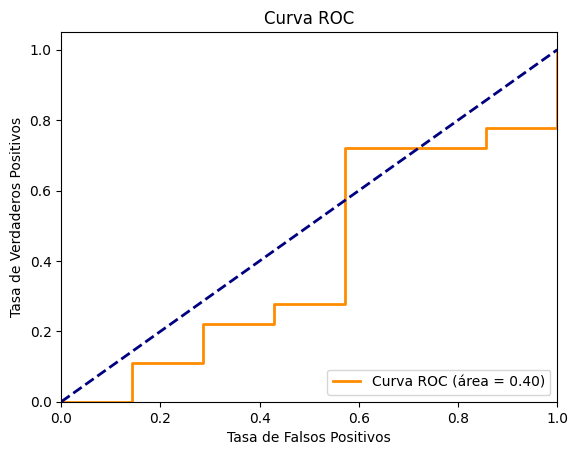

In [88]:
#Se calculan las probabilidades de la curva ROC para calcular la curva ROC y el AUC
y_pred_proba = XGBoost.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#Se imprime la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

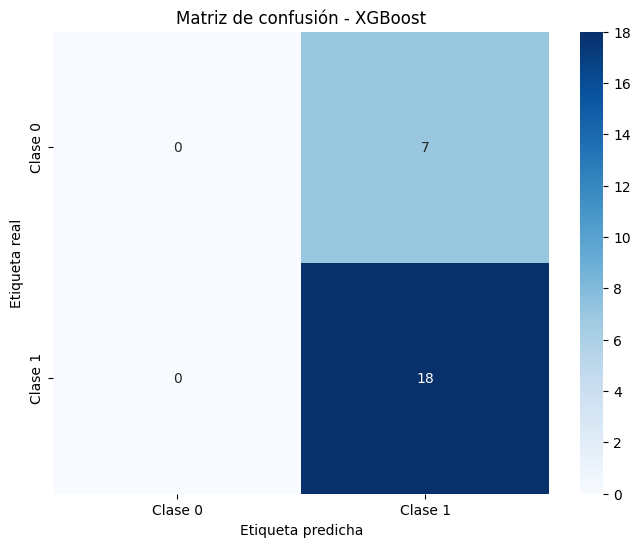

In [89]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta real')
plt.title('Matriz de confusión - XGBoost')
plt.show()

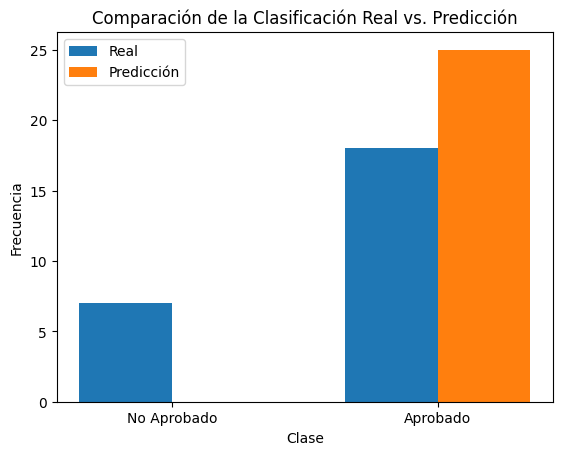

In [90]:
#Calculamos las frecuencias de las clases en los datos reales y predichos
real_class_counts = np.bincount(y_test)
predicted_class_counts = np.bincount(y_pred)

#Nos aseguramos que los vectores tienen la misma longitud
max_length = max(len(real_class_counts), len(predicted_class_counts))
real_class_counts = np.pad(real_class_counts, (0, max_length - len(real_class_counts)), 'constant')
predicted_class_counts = np.pad(predicted_class_counts, (0, max_length - len(predicted_class_counts)), 'constant')
class_labels = ['No Aprobado', 'Aprobado']

#Creación del diagrama de barras para la visualización de los datos
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(class_labels))
bar1 = ax.bar(index, real_class_counts, bar_width, label='Real')
bar2 = ax.bar(index + bar_width, predicted_class_counts, bar_width, label='Predicción')
ax.set_xlabel('Clase')
ax.set_ylabel('Frecuencia')
ax.set_title('Comparación de la Clasificación Real vs. Predicción')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(class_labels)
ax.legend()

plt.show()

In [91]:
#Comparación de y_test y y_pred
df_results = pd.concat([y_test, pd.Series(y_pred)], axis = 1)
df_results.rename(columns={'nota_final_aprobado':'y_test', 0:'y_pred'}, inplace=True)
df_results

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,0,1
4,0,1
5,1,1
6,0,1
7,0,1
8,0,1
9,1,1
